Импортируем нужные библиотеки

In [ ]:
import pandas as pd
import plotly.express as px  # Для быстрых построений графиков
import plotly.graph_objs as go  # Для гибких построений графиков

Загружаем наш датасет

In [ ]:
! gdown 1aJMQf55l20ulc0aruJ1XMbokj28ZXb7r
df = pd.read_csv("/content/marketing_campaign.csv", sep='\t')

Downloading...
From: https://drive.google.com/uc?id=1aJMQf55l20ulc0aruJ1XMbokj28ZXb7r
To: /content/marketing_campaign.csv
100% 220k/220k [00:00<00:00, 90.5MB/s]


посмотрим как выглядят данные

In [ ]:
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0


проведём очистку данных

In [ ]:
len_before = df.shape[0]
print(f" Количество строк до очистки {df.shape[0]}")

 Количество строк до очистки 2240


In [ ]:
dupli = df.duplicated()
dupli = dupli.sum()
print(f" Количество дубликатов {dupli}")
df = df.drop_duplicates()
df = df.dropna()
len_after = df.shape[0]
print(f" Количество строк после очистки {df.shape[0]}")
print(f" Количество удалённых строк {len_before - len_after}")

 Количество дубликатов 0
 Количество строк после очистки 2216
 Количество удалённых строк 24


уберём непонятные категории

In [ ]:
df = df[~df["Marital_Status"].isin(["Alone", "Absurd", "YOLO"])]
print(f" Количество строк после того, как убрали лишнее {df.shape[0]}")

 Количество строк после того, как убрали лишнее 2209


посмотрим матожидание, дисперсия, медиану

In [ ]:
mean = df["Income"].mean()
var = df["Income"].var()
median = df["Income"].median()
print(f"Матожидание: {mean}", end=' ')
print(f"Дисперсия: {var}", end=' ')
print(f"Медиана: {median}")

Матожидание: 52243.9778180172 Дисперсия: 634963185.567895 Медиана: 51390.0


Добавим деление по возрастным группам

In [ ]:
def map_to_age_bin(age):
    if age < 12:
        return "12-"
    elif age < 18:
        return "12-17"
    elif age < 26:
        return "18-25"
    elif age < 36:
        return "26-35"
    elif age < 46:
        return "36-45"
    elif age < 61:
        return "46-60"
    elif age < 71:
        return "61-70"
    else:
        return "70+"
df["age"] = df.Dt_Customer.str[-4:].astype(int) - df.Year_Birth
df["age_bin"] = df["age"].apply(map_to_age_bin)

In [ ]:
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,age,age_bin
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,0,0,0,0,0,3,11,1,55,46-60
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,0,0,0,0,0,3,11,0,60,46-60
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,0,0,0,0,0,3,11,0,48,46-60
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,0,0,0,0,0,3,11,0,30,26-35
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,0,0,0,0,0,3,11,0,33,26-35


посмотрим данные по заработку в зависимости от семейного статуса

In [ ]:
fig = px.histogram(
        df,
        x='Education', y='Income',
        histfunc='avg',
        title='Средний доход в зависимости от образования'
)
fig.update_layout(xaxis_title="Образование")
fig.update_layout(yaxis_title="Зарплата")

In [ ]:
fig = px.histogram(
        df,
        x='Marital_Status', y='Income',
        histfunc='avg',
        title='Средний доход в различных категориях семейного статуса'
)
fig.update_layout(xaxis_title="Семейный Статус")
fig.update_layout(yaxis_title="Зарплата")

гипотеза 1 - чем старше человек, тем больше он зарабатывает

In [ ]:
avg_income_by_age = df.groupby('age')['Income'].mean().reset_index()
avg_income_by_age = avg_income_by_age[(avg_income_by_age['age'] < 74) & (avg_income_by_age['age'] > 18)]
fig = px.line(avg_income_by_age, x='age', y='Income', title='Средняя зарплата по возрасту')
fig.update_layout(xaxis_title="Возраст")
fig.update_layout(yaxis_title="Зарплата")
fig.show()

Гипотеза 2 - Люди среднего возраста больше всего тратят на вино

In [ ]:
fig = px.histogram(
        df,
        x='MntWines',
        nbins=70,
        title='Гистограмма распределения трат на вино за последние 2 года<br>по возрастным группам',
        color="age_bin",
        barnorm='percent',
        marginal='rug',
        width=1200,
        height=500,
        category_orders={"age_bin": sorted(df["age_bin"].unique())}

)
fig.update_layout(xaxis_title="Траты на вино")
fig.update_layout(yaxis_title="Процент клиентов")

Гипотеза 3 - больше всего тратят на мясо

In [ ]:
sums = df[['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']].sum().reset_index()

# Строим график
fig = px.bar(sums, x='index', y=0, title='Траты по категориям', labels={'index': 'Колонки', 0: 'Сумма'})
fig.update_layout(xaxis_title="Траты")
fig.update_layout(yaxis_title="Категории")
fig.show()

Гипотеза 4 - больше всего детей у людей с средним образованием

In [ ]:
data_new = df.groupby(["Education", "age_bin"])[['Kidhome', 'Teenhome']].mean().reset_index()
data_new = data_new.rename(columns={
    'Education': 'Уровень образования',
    'age_bin': 'Возрастная группа',
    'Kidhome': 'Количество детей',
    'Teenhome': 'Количество подростков'
})
fig = px.bar(
        data_new,
        x='Уровень образования', y='Количество детей',
        title='Среднее количество детей в различных категориях образования<br>по возрастным группам' + \
                ' с учетом среднего количества подростков',
        color='Количество подростков',
        facet_col='Возрастная группа',
        facet_col_wrap=4,
        facet_row_spacing=0.16,
        height=700
)

fig.update_layout(margin=dict(t=200))
fig.show()

Гипотеза 5 - магазин - самый попульярный способ покупки товаров

In [ ]:
df["Dt_Customer"] = pd.to_datetime(df["Dt_Customer"], errors='coerce')
df["month_year"] = df["Dt_Customer"].dt.to_period('M').dt.to_timestamp()
data_new = df.groupby(["month_year"])[['NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases']].sum().reset_index()
fig = go.Figure()  # Создаем фигуру
trace1 = go.Scatter(
    x=data_new["month_year"], # Тут уже указываем сами значения, как в matplotlib
    y=data_new["NumWebPurchases"],
    mode='lines', # По дефолту точки соединяются линиями
    name='Кол-во покупок через сайт',
)
trace2 = go.Scatter(
    x=data_new["month_year"], # Тут уже указываем сами значения, как в matplotlib
    y=data_new["NumCatalogPurchases"],
    mode='lines',
    name='Кол-во покупок через каталог'
)
trace3 = go.Scatter(
    x=data_new["month_year"], # Тут уже указываем сами значения, как в matplotlib
    y=data_new["NumStorePurchases"],
    mode='lines',
    name='Кол-во покупок через магазин'
)
fig.add_trace(trace1) # Добавляем графики на фигуру
fig.add_trace(trace2)
fig.add_trace(trace3)

fig.update_layout(
    yaxis_title="кол-во покупок",
    xaxis_title='месяц',
    title={
        'text': "Количество покупок в зависимости от способа",
        'font_size': 30 # Выставить размер шрифта
    },
)

fig.show()

Матрица корреляции

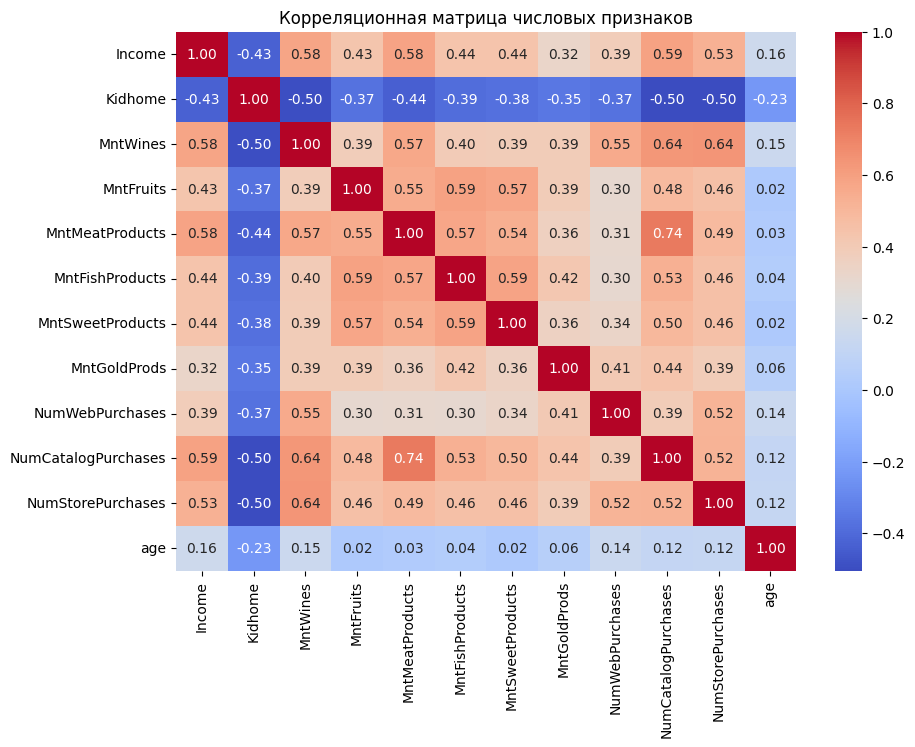

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate the correlation matrix
numeric_df = df.select_dtypes(include=['number'])
numeric_df = numeric_df.drop(columns=['ID', 'AcceptedCmp3', 'AcceptedCmp2',
                                      'AcceptedCmp1', 'AcceptedCmp4', 'AcceptedCmp5', 'Recency', 'Z_CostContact'
                                      , 'Z_Revenue', 'Year_Birth', 'Complain', 'Response', 'Teenhome', 'NumWebVisitsMonth', 'NumDealsPurchases'])
corr_matrix = numeric_df.corr()

# Plot the heatmap
plt.figure(figsize=(10, 7))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', cbar=True)
plt.title("Корреляционная матрица числовых признаков")
plt.show()